# Q5

## Import the libraries

In [1]:
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

## Load the data

In [2]:
data = None
with open('Data' + os.sep + 'seeds.csv') as fp:
    data = [x.strip().split(',') for x in fp.readlines()]

headers = data[0]
class_field = len(headers)-1
data = [[int(x[i]) if i==class_field else float(x[i]) for i in range(len(x))] for x in data[1:]]
data = np.asarray(data)

print('Attributes - ')
print('\t'.join([x[:6] for x in headers]))
for i in range(len(data[:10])):
    print('\t'.join(['{0:.3f}'.format(x) for x in data[i]]))
print('...')
print(str(len(data)-10) + ' more rows.')

Attributes - 
area_A	perime	compac	kernel	kernel	asymme	kernel	Class
15.260	14.840	0.871	5.763	3.312	2.221	5.220	1.000
14.880	14.570	0.881	5.554	3.333	1.018	4.956	1.000
14.290	14.090	0.905	5.291	3.337	2.699	4.825	1.000
13.840	13.940	0.895	5.324	3.379	2.259	4.805	1.000
16.140	14.990	0.903	5.658	3.562	1.355	5.175	1.000
14.380	14.210	0.895	5.386	3.312	2.462	4.956	1.000
14.690	14.490	0.880	5.563	3.259	3.586	5.219	1.000
14.110	14.100	0.891	5.420	3.302	2.700	5.000	1.000
16.630	15.460	0.875	6.053	3.465	2.040	5.877	1.000
16.440	15.250	0.888	5.884	3.505	1.969	5.533	1.000
...
200 more rows.


In [3]:
types = {'[ORIGINAL]': None, '[NORMALIZED]': None, '[STANDARDIZED]': None}
type_names = ['[ORIGINAL]', '[NORMALIZED]', '[STANDARDIZED]']
dists = {'[EUCLIDEAN]': dist.euclidean,
         '[MAHALANOBIS]': dist.mahalanobis,
         '[CITY BLOCK]': dist.cityblock,
         '[MINKOWSKI (R=3)]': dist.minkowski,
         '[CHEBYSHEV]': dist.chebyshev,
         '[COSINE]': dist.cosine,
         '[CANBERRA]': dist.canberra}
dist_funcs = (dist.euclidean, 
              dist.mahalanobis, 
              dist.cityblock, 
              dist.minkowski, 
              dist.chebyshev, 
              dist.cosine, 
              dist.canberra)
dist_names = ('[EUCLIDEAN]', 
              '[MAHALANOBIS]', 
              '[CITY BLOCK]', 
              '[MINKOWSKI (R=3)]', 
              '[CHEBYSHEV]', 
              '[COSINE]', 
              '[CANBERRA]')

## (A) Select the attributes and normalize/standardize

In [4]:
select_headers = [headers[0], headers[4]]
select = data[:,[0,4]]

print('Total Observations - ' + str(len(select)) + '\n')
print('Attributes - ')
print('\t'.join([x[:6] for x in select_headers]))
for i in range(len(select[:10])):
    print('\t'.join(['{0:.3f}'.format(x) for x in select[i]]))
print('...')
print(str(len(data)-10) + ' more rows.')

Total Observations - 210

Attributes - 
area_A	kernel
15.260	3.312
14.880	3.333
14.290	3.337
13.840	3.379
16.140	3.562
14.380	3.312
14.690	3.259
14.110	3.302
16.630	3.465
16.440	3.505
...
200 more rows.


In [5]:
def printrange(val, headers, dtype):
    print(dtype + ' Range of values - ')
    amin = np.amin(val, axis=0)
    amax = np.amax(val, axis=0)
    print('\t' + '\t'.join(headers))
    print('min\t' + '\t'.join(['{0:.3f}'.format(x) for x in amin]))
    print('max\t' + '\t'.join(['{0:.3f}'.format(x) for x in amax]))
    print('range\t' + '\t'.join(['{0:.3f}'.format(x) for x in amax-amin]))
    print('\n')
    return amin, amax

In [6]:
amin, amax = printrange(select, select_headers, '[ORIGINAL]')
types['[ORIGINAL]'] = select

normal = np.copy(select)
normal = (normal - amin)/(amax - amin)
amin, amax = printrange(normal, select_headers, '[NORMALIZED]')
types['[NORMALIZED]'] = normal

amean = np.mean(select, axis=0)
astd = np.std(select, axis=0)
standard = np.copy(select)
standard = (standard - amean)/astd
amin, amax = printrange(standard, select_headers, '[STANDARDIZED]')
types['[STANDARDIZED]'] = standard

[ORIGINAL] Range of values - 
	area_A	kernel_width
min	10.590	2.630
max	21.180	4.033
range	10.590	1.403


[NORMALIZED] Range of values - 
	area_A	kernel_width
min	0.000	0.000
max	1.000	1.000
range	1.000	1.000


[STANDARDIZED] Range of values - 
	area_A	kernel_width
min	-1.467	-1.668
max	2.182	2.055
range	3.648	3.723




In [7]:
print('\t'.join(type_names))
print('\t'.join(['\t'.join([x[:6] for x in select_headers])]*3))
for i in range(len(select[:20])):
    t = []
    for y in type_names:
        t.append('\t'.join(['{0:.3f}'.format(x) for x in types[y][i]]))
    print('\t'.join(t))
print('...')
print(str(len(select)-20) + ' more rows.')

[ORIGINAL]	[NORMALIZED]	[STANDARDIZED]
area_A	kernel	area_A	kernel	area_A	kernel
15.260	3.312	0.441	0.486	0.142	0.142
14.880	3.333	0.405	0.501	0.011	0.197
14.290	3.337	0.349	0.504	-0.192	0.208
13.840	3.379	0.307	0.534	-0.347	0.320
16.140	3.562	0.524	0.664	0.445	0.805
14.380	3.312	0.358	0.486	-0.161	0.142
14.690	3.259	0.387	0.448	-0.054	0.001
14.110	3.302	0.332	0.479	-0.254	0.115
16.630	3.465	0.570	0.595	0.614	0.548
16.440	3.505	0.552	0.624	0.549	0.654
15.260	3.242	0.441	0.436	0.142	-0.044
14.030	3.201	0.325	0.407	-0.282	-0.153
13.890	3.199	0.312	0.406	-0.330	-0.158
13.780	3.156	0.301	0.375	-0.368	-0.272
13.740	3.114	0.297	0.345	-0.382	-0.384
14.590	3.333	0.378	0.501	-0.089	0.197
13.990	3.383	0.321	0.537	-0.295	0.330
15.690	3.514	0.482	0.630	0.290	0.678
14.700	3.466	0.388	0.596	-0.051	0.550
12.720	3.049	0.201	0.299	-0.733	-0.556
...
190 more rows.


## (B) Distance Metrics

### (i) Scatter Plots

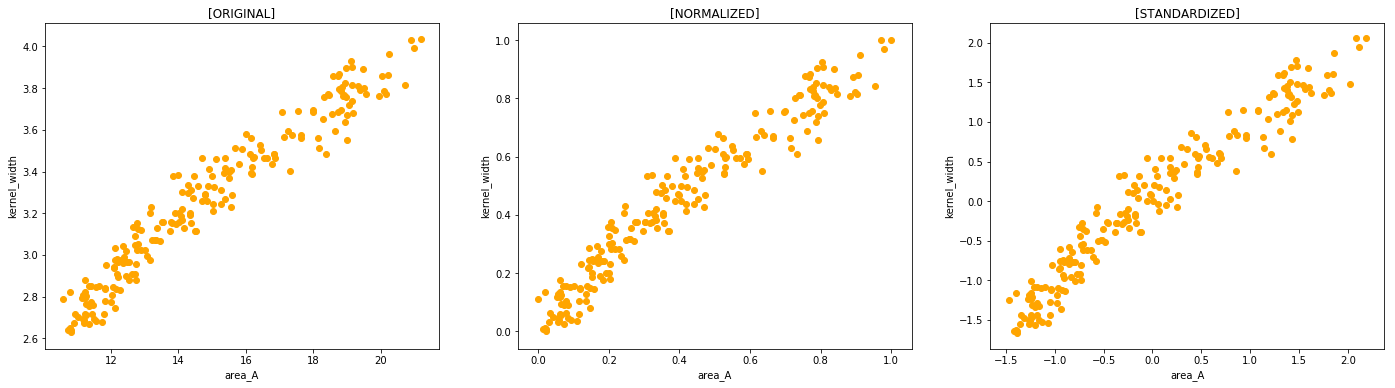

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(6)
fig.set_figwidth(24)

for i, data in enumerate(type_names):
    axes[i].set_title(data)
    axes[i].set_xlabel(select_headers[0])
    axes[i].set_ylabel(select_headers[1])
    axes[i].scatter(types[data][:,0], types[data][:,1], c='orange')

plt.show()

#### Analysis

1. All the plots show that there is high colinearity between the 2 attributes.
2. Normalization and Standardization do not change the relative positioning of the elements, but scale the values.
3. Normalization only scales the values so that the range of values in the dataset is 1 and the minimum and maximum are 1 and 0 respectively. This effectively reduces the spread of the dataset to 1 unit if we plot its histogram.
4. Standardization scales the data so that the mean of the dataset is 0 and has a unit standard deviation. This helps preserve the spread of the data, allowing us to compare the distribution of this data with the standard normal distribution.

### (ii) Mean values for all categories

In [9]:
def getmeanstd(val, headers, dtype):
    print(dtype + ' Mean and Standard Deviation - ')
    mean = np.mean(val, axis=0)
    std = np.std(val, axis=0)
    print('\t' + '\t'.join(headers))
    print('mean\t' + '\t'.join(['{0:.3f}'.format(x) for x in mean]))
    print('st.dev\t' + '\t'.join(['{0:.3f}'.format(x) for x in std]))
    print()
    return mean, std

[ORIGINAL] Mean and Standard Deviation - 
	area_A	kernel_width
mean	14.848	3.259
st.dev	2.903	0.377

[NORMALIZED] Mean and Standard Deviation - 
	area_A	kernel_width
mean	0.402	0.448
st.dev	0.274	0.269

[STANDARDIZED] Mean and Standard Deviation - 
	area_A	kernel_width
mean	-0.000	-0.000
st.dev	1.000	1.000



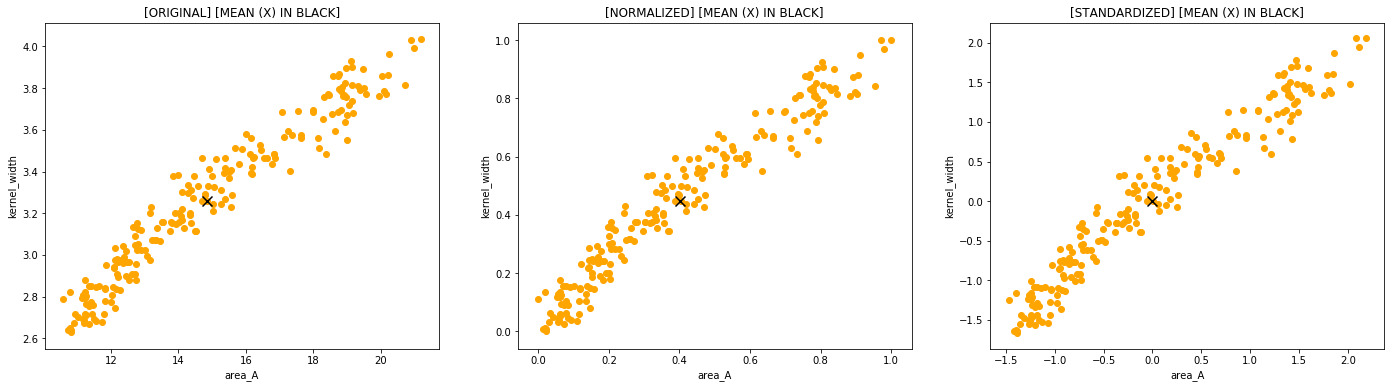

In [10]:
mean = {x:None for x in types.keys()}
std = {x:None for x in types.keys()}

for data in types.keys():
    mean[data], std[data] = getmeanstd(types[data], select_headers, data)

fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(6)
fig.set_figwidth(24)

for i, data in enumerate(type_names):
    axes[i].set_title(data + ' [MEAN (X) IN BLACK]')
    axes[i].set_xlabel(select_headers[0])
    axes[i].set_ylabel(select_headers[1])
    axes[i].scatter(types[data][:,0], types[data][:,1], c='orange')
    axes[i].scatter(mean[data][0], mean[data][1], s=100, c='black', marker='x')

plt.show()

### (iii) Distance from mean for all categories over all distance metrics

In [11]:
def getdists(types, mean, dist_funcs, dist_names, type_names):
    t = [] 
    for i in range(len(dist_funcs)):
        ret = []
        for x in type_names:
            if dist_names[i]=='[MAHALANOBIS]':
                ret.append([dist_funcs[i](mean[x], y, np.linalg.inv(np.cov(types[x].T))) for y in types[x]])
            elif dist_names[i]=='[MINKOWSKI (R=3)]':
                ret.append([dist_funcs[i](mean[x], y, 3) for y in types[x]])
            else:
                ret.append([dist_funcs[i](mean[x], y) for y in types[x]])
        ret = np.asarray(ret)
        ret = np.transpose(ret)
        t.append(ret)
    return t

In [12]:
alldists = getdists(types, mean, dist_funcs, dist_names, type_names)

### (iv) Top 10 nearest points for each distance metric

In [13]:
def gettop10s(alldists, type_names):
    t = []
    for x in alldists:
        d = {key:None for key in type_names}
        c = np.copy(x)
        c.sort(axis=0)
        c = c[9]
        for i in range(len(type_names)):
            d[type_names[i]] = np.where(x[:,i]<=c[i])[0]
        t.append(d)
    return t

In [14]:
top10s = gettop10s(alldists, type_names)

In [15]:
for i,x in enumerate(dist_names):
    print(x)
    for y in type_names:
        print('\t' + y + ' : ' + ', '.join([str(n) for n in top10s[i][y]]))
    print()

[EUCLIDEAN]
	[ORIGINAL] : 1, 6, 24, 34, 38, 47, 48, 49, 55, 57
	[NORMALIZED] : 6, 10, 24, 34, 38, 48, 49, 50, 55, 132
	[STANDARDIZED] : 6, 10, 24, 34, 38, 48, 49, 50, 55, 132

[MAHALANOBIS]
	[ORIGINAL] : 0, 6, 21, 24, 32, 33, 49, 53, 66, 67
	[NORMALIZED] : 0, 6, 21, 24, 32, 33, 49, 53, 66, 67
	[STANDARDIZED] : 0, 6, 21, 24, 32, 33, 49, 53, 66, 67

[CITY BLOCK]
	[ORIGINAL] : 1, 6, 24, 34, 38, 47, 48, 49, 55, 57
	[NORMALIZED] : 1, 6, 10, 24, 38, 48, 49, 50, 55, 132
	[STANDARDIZED] : 1, 6, 10, 24, 38, 48, 49, 50, 55, 132

[MINKOWSKI (R=3)]
	[ORIGINAL] : 1, 6, 24, 34, 38, 47, 48, 49, 55, 57
	[NORMALIZED] : 0, 6, 10, 24, 38, 48, 49, 50, 55, 132
	[STANDARDIZED] : 0, 6, 10, 24, 38, 48, 49, 50, 55, 132

[CHEBYSHEV]
	[ORIGINAL] : 1, 6, 24, 34, 38, 47, 48, 49, 55, 57
	[NORMALIZED] : 0, 5, 6, 10, 24, 38, 48, 49, 50, 55
	[STANDARDIZED] : 0, 5, 6, 10, 24, 38, 48, 49, 50, 55

[COSINE]
	[ORIGINAL] : 4, 20, 22, 31, 34, 43, 46, 49, 68, 134
	[NORMALIZED] : 0, 9, 36, 49, 66, 112, 130, 139, 140, 162
	[STA

### (v) Plot top 10 nearest points

In [16]:
def gplot(axes, i, j, title, dist, mean, headers, original, labels):
    axes[i,j].set_title(title)
    axes[i,j].scatter(dist[:,0], dist[:,1], s=50, c='orange')
    axes[i,j].scatter(mean[0], mean[1], s=150, c='black', marker='x')
    axes[i,j].set_xlabel(headers[0])
    axes[i,j].set_ylabel(headers[1])
    for k,label in enumerate(labels):
        axes[i,j].annotate(label, (dist[k,0], dist[k,1]))

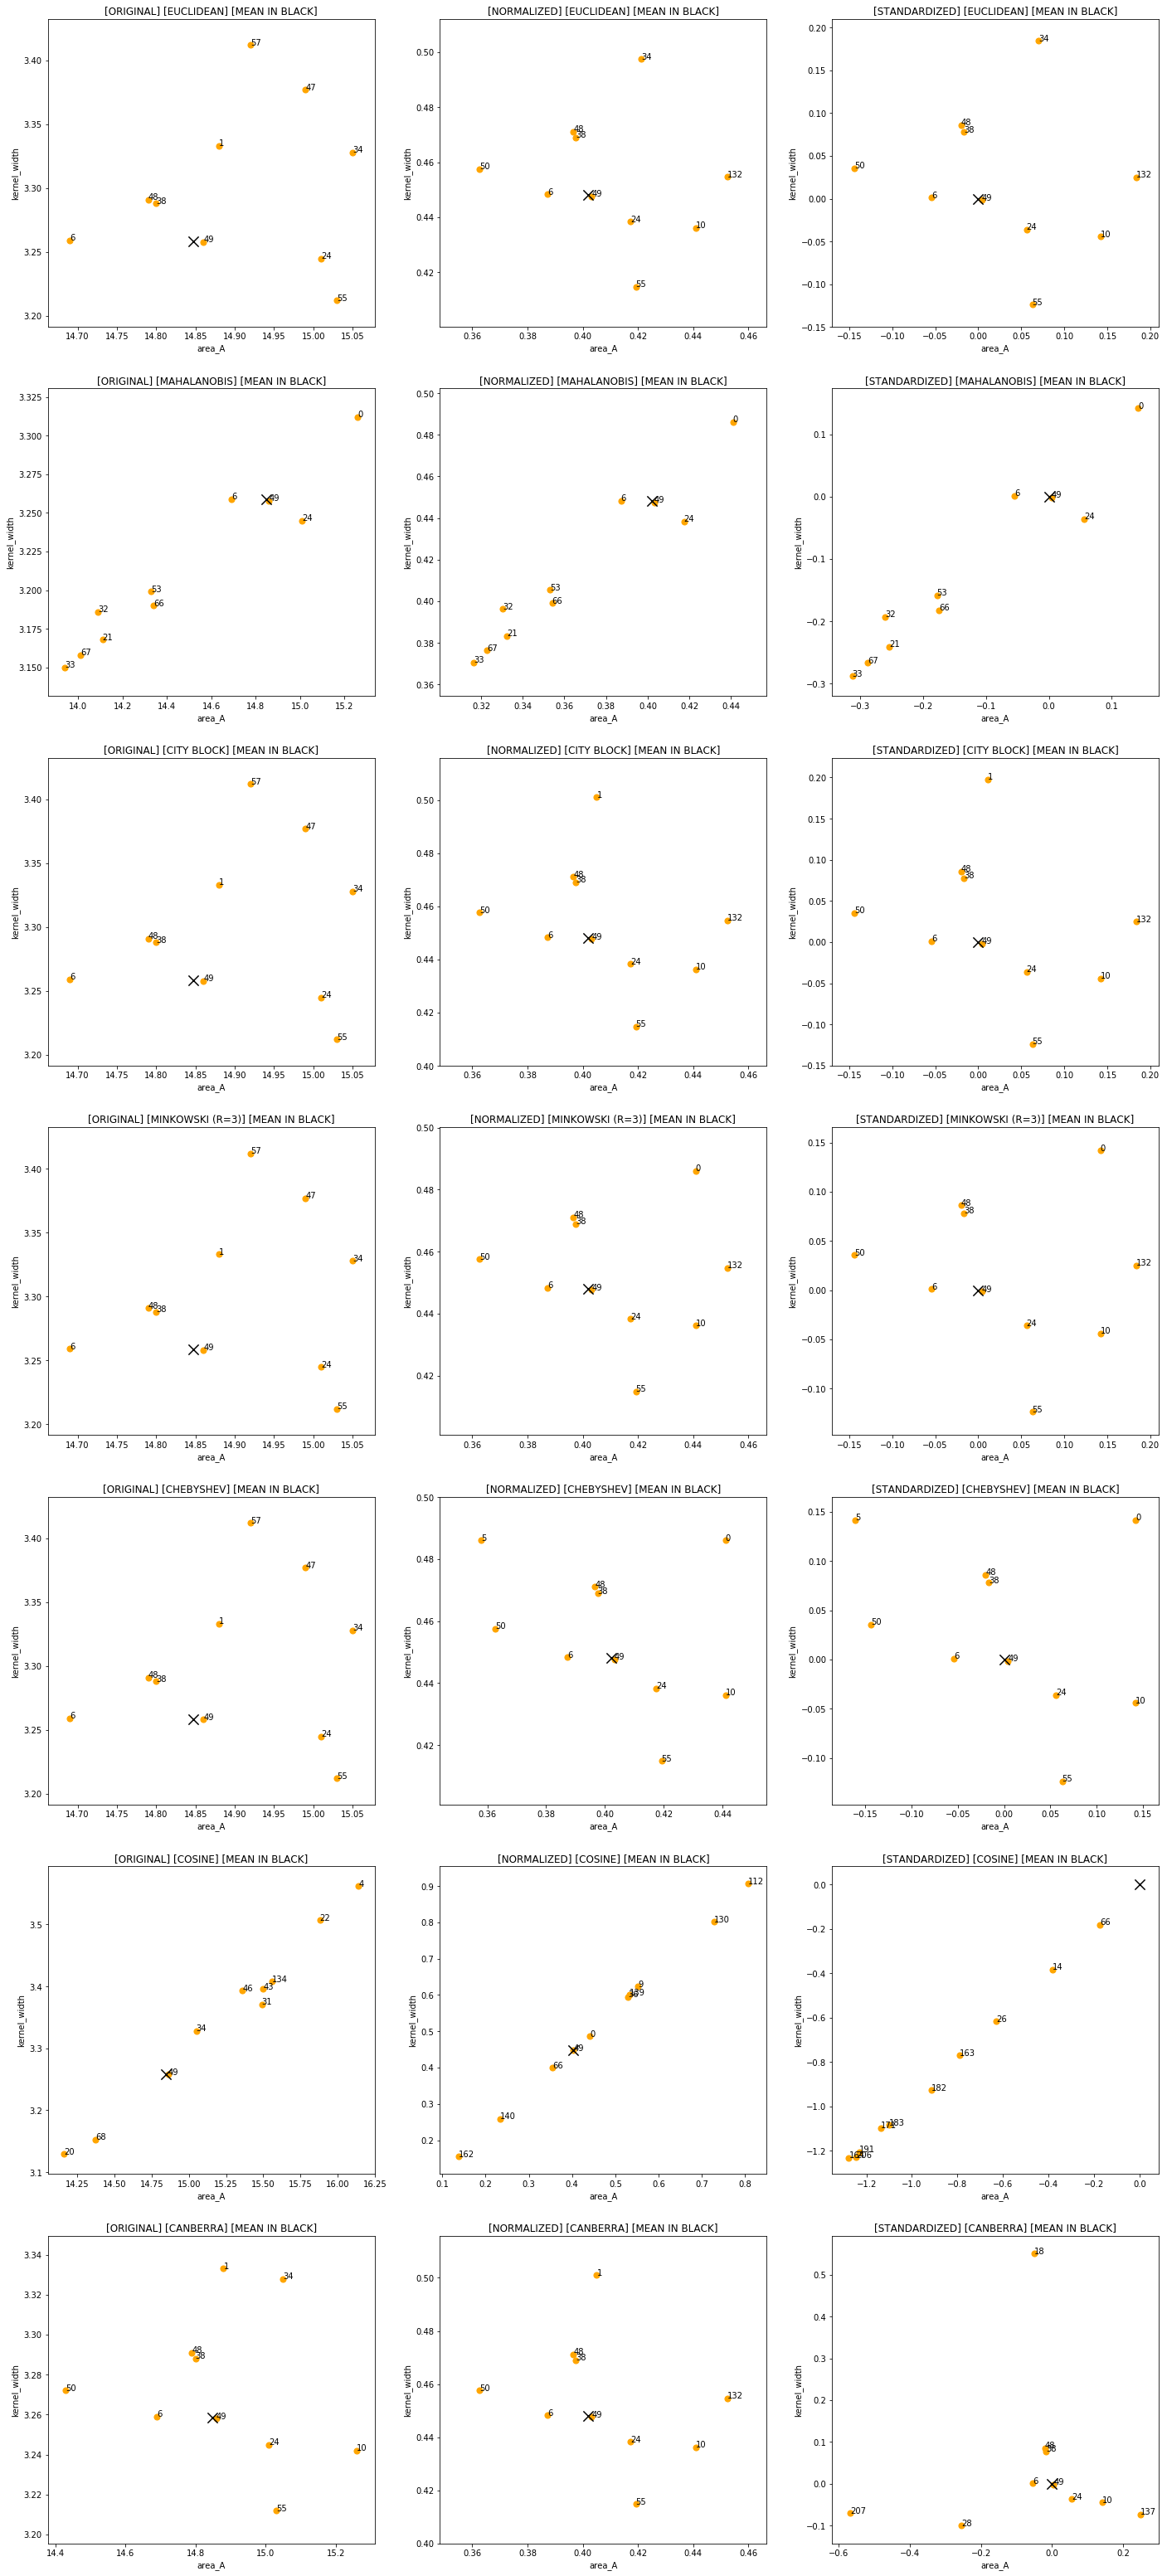

In [17]:
fig, axes = plt.subplots(nrows=len(alldists), ncols=len(type_names))
fig.set_figheight(56)
fig.set_figwidth(24)

for i in range(len(alldists)):
    for j in range(len(type_names)):
        gplot(axes, i, j, type_names[j] + ' ' + dist_names[i] + ' [MEAN IN BLACK]', types[type_names[j]][top10s[i][type_names[j]]], mean[type_names[j]], select_headers, types[type_names[j]], top10s[i][type_names[j]])

plt.show()

### (vi) Verification if the nearest points are similar across all distance metrics

In [18]:
s = {}
for y in type_names:
    print(y)
    t = set()
    for i,x in enumerate(dist_names):
        if x not in ['[MAHALANOBIS]', '[COSINE]', '[CANBERRA]']:
            if len(t)==0:
                t = set(top10s[i][y])
            else:
                t = t.intersection(top10s[i][y])
        print('\t' + x + ' : ' + ', '.join([str(n) for n in top10s[i][y]]))
    s[y] = sorted(list(t))
    print()

[ORIGINAL]
	[EUCLIDEAN] : 1, 6, 24, 34, 38, 47, 48, 49, 55, 57
	[MAHALANOBIS] : 0, 6, 21, 24, 32, 33, 49, 53, 66, 67
	[CITY BLOCK] : 1, 6, 24, 34, 38, 47, 48, 49, 55, 57
	[MINKOWSKI (R=3)] : 1, 6, 24, 34, 38, 47, 48, 49, 55, 57
	[CHEBYSHEV] : 1, 6, 24, 34, 38, 47, 48, 49, 55, 57
	[COSINE] : 4, 20, 22, 31, 34, 43, 46, 49, 68, 134
	[CANBERRA] : 1, 6, 10, 24, 34, 38, 48, 49, 50, 55

[NORMALIZED]
	[EUCLIDEAN] : 6, 10, 24, 34, 38, 48, 49, 50, 55, 132
	[MAHALANOBIS] : 0, 6, 21, 24, 32, 33, 49, 53, 66, 67
	[CITY BLOCK] : 1, 6, 10, 24, 38, 48, 49, 50, 55, 132
	[MINKOWSKI (R=3)] : 0, 6, 10, 24, 38, 48, 49, 50, 55, 132
	[CHEBYSHEV] : 0, 5, 6, 10, 24, 38, 48, 49, 50, 55
	[COSINE] : 0, 9, 36, 49, 66, 112, 130, 139, 140, 162
	[CANBERRA] : 1, 6, 10, 24, 38, 48, 49, 50, 55, 132

[STANDARDIZED]
	[EUCLIDEAN] : 6, 10, 24, 34, 38, 48, 49, 50, 55, 132
	[MAHALANOBIS] : 0, 6, 21, 24, 32, 33, 49, 53, 66, 67
	[CITY BLOCK] : 1, 6, 10, 24, 38, 48, 49, 50, 55, 132
	[MINKOWSKI (R=3)] : 0, 6, 10, 24, 38, 48, 49, 5

#### Analysis

1. The top 10 points are not same for all distance metrics. Apart from **MAHALANOBIS, COSINE and CANBERRA**, almost all other metrics share more than 70% of the points.
 - For **original data**, apart from the above 3, all other distance metrics give the same points - 1, 6, 24, 34, 38, 47, 48, 49, 55, 57
 - For **normalized data**, apart from the above 3, 80% of the points are same across all metrics - 6, 10, 24, 38, 48, 49, 50, 55
 - For **standardized data**, apart from the above 3, 80% of the points are same across all metrics - 6, 10, 24, 38, 48, 49, 50, 55

2. **MAHALANOBIS** gives different points as it lets the data decide the coordinate system, ie - it transforms the coordinates along the 1st and 2nd PCA components(in case of 2 dimensional data) and then calculates the Euclidean distance between points in this tranformed space.

3. **COSINE** distance selects points that are radially close to each other from the center. In our case, one of those points is the mean, hence this metric tends to select points which are lying on or near the line connecting the mean and origin. If the angle between 2 points from the center is near to 0, cosine reaches its maximum. Cosine Distance is 1-cos(theta), hence this distance is minimum when the cosine is maximum.

4. **CANBERRA** distance for standardized distance is just random selection of 10 points. Canberra distance from mean (0,0) is 1 for all the points. This distance metric tends to select the points whose abcissa or ordinate is the same as the other point (in our case the mean). Hence most of the points are near the imaginary vertical and horizontal line intersecting at the mean.

### (vii) Results

We can clearly see from the above scenario that most of the distance metrics are heavily affected by the range of values along each dimension of the data. If the range of one of the dimensions is much greater than the other, it tends to dominate the distance value. This might lead to unequal contribution of each dimension in calculating distance between 2 points.

Some distance metrics like Mahalanobis, Canberra and Cosine overcome this issue and give different points. Cosine is very favorable for calculating similarity between vectors. Mahalanobis is completely independent of the Euclidean co-ordinate axis, and calculates the distance along completely different co-ordinate system dictated by the variance in the data.

Thus it is important to transform the data to avoid effect of dimension with large range of values. 

Normalization scales all the dimensions in the range of [0,1] Thus all dimensions have equal weightage. But this also incorporates the outliers in the actual data, thus it is not useful in scenarios which are highly sensitive to outliers. 

Standardization on the other hand preserves the spread of the distribution along each dimension and also centers the mean of each dimension at 0 with a standard deviation of 1. This allows us to make comparisions with the Standard Normal Distribution and also helps eliminate outliers, while also reducing the range of data.